## AM Modulation

Text(0, 0.5, 'Amplitude')

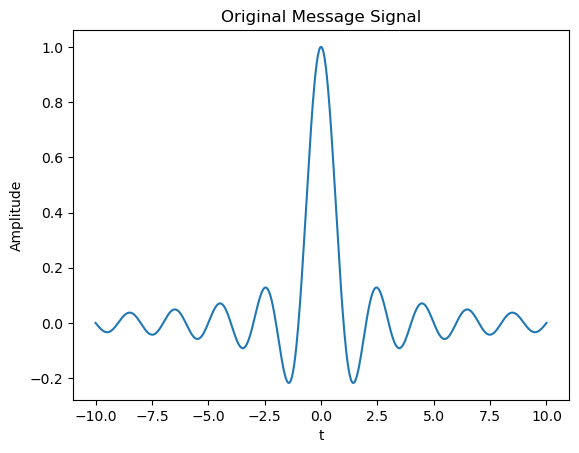

In [24]:
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(-10, 10, 800)

m = np.sinc(t)
fc = 3
c = np.cos(2*np.pi*fc*t)
s = (1 + m)* c

plt.plot(t, m)
plt.title("Original Message Signal")
plt.xlabel("t")
plt.ylabel("Amplitude")


Text(0, 0.5, 'y')

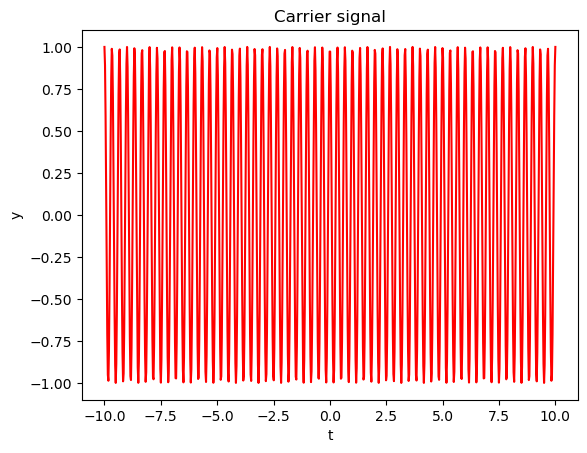

In [20]:

plt.plot(t, c, color='r')
plt.title("Carrier signal")
plt.xlabel("t")
plt.ylabel("y")

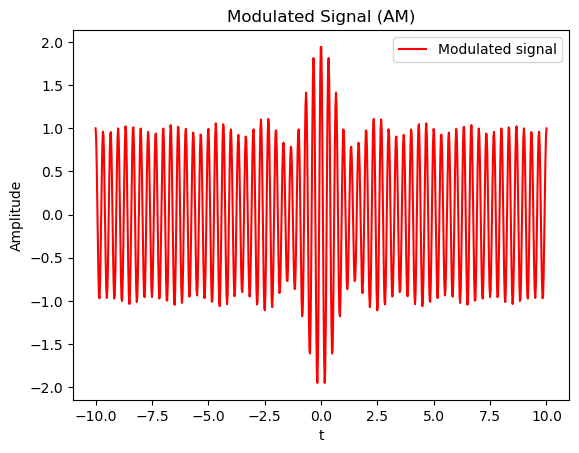

<Figure size 640x480 with 0 Axes>

In [25]:

#plt.plot(t, m+1, label="Initial message")
plt.plot(t, s, color='r', label="Modulated signal")
plt.title("Modulated Signal (AM)")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
plt.tight_layout()

## Demodulation

### Envelope detection

Text(0, 0.5, 'Amplitude')

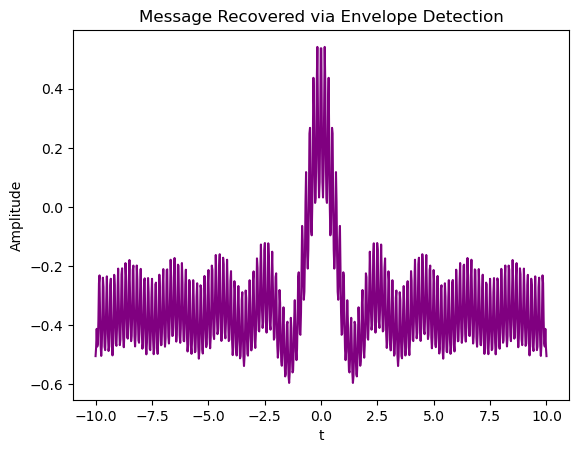

In [27]:
s_abs = np.abs(s)

def low_pass_filter(signal, cutoff=5):
    # Simple moving average filter (smoothing) to simulate a low-pass filter
    return np.convolve(signal, np.ones(cutoff)/cutoff, mode='same')

envelope = low_pass_filter(s_abs)

m_recovered_envelope = envelope - 1

plt.plot(t, m_recovered_envelope, label='Message Recovered via Envelope Detection', color='purple')
plt.title("Message Recovered via Envelope Detection")
plt.xlabel("t")
plt.ylabel("Amplitude")

### Synchronous demodulation

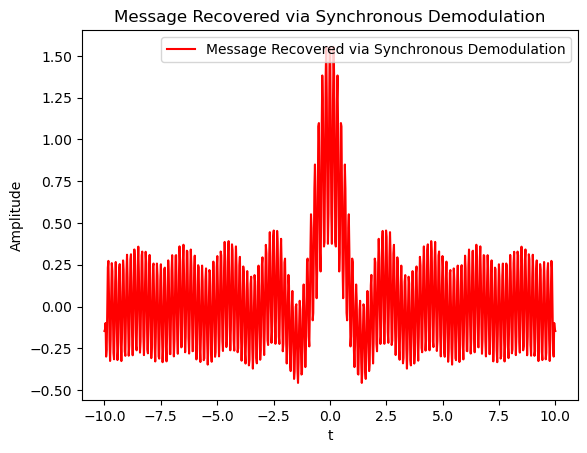

In [28]:
s_sync = s * c

# Low-pass filter the result (remove high-frequency components)
filtered_sync = low_pass_filter(s_sync)

m_recovered_sync = 2 * filtered_sync - 1

plt.plot(t, m_recovered_sync, label='Message Recovered via Synchronous Demodulation', color='red')
plt.title("Message Recovered via Synchronous Demodulation")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()

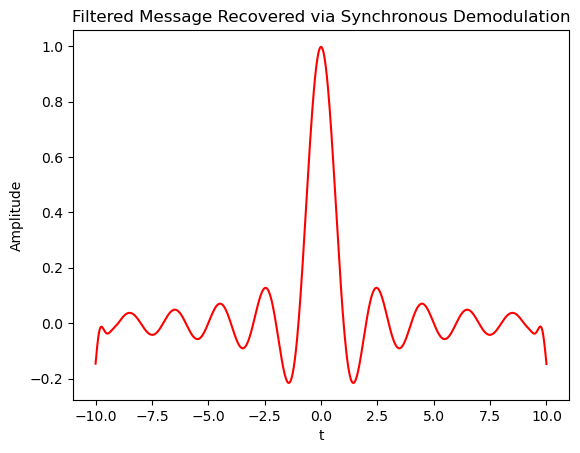

In [30]:
from scipy import signal

# Butterworth low-pass filter design
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)
    y = signal.filtfilt(b, a, data)
    return y

# Sampling frequency (should be higher than twice the carrier frequency)
fs = 1000  # Hz (example)
cutoff = 50  # Cutoff frequency for low-pass filter (Hz)

# Apply the Butterworth filter to the signal
m_recovered_sync_filtered = butter_lowpass_filter(m_recovered_sync, cutoff, fs)

# Plot the filtered signal
plt.plot(t, m_recovered_sync_filtered, label='Filtered Message (Synchronous Demodulation)', color='red')
plt.title("Filtered Message Recovered via Synchronous Demodulation")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.show()
